In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Chargement du dataset

Lecture du dataset

In [2]:
df = pd.read_csv('./datasets/mall_customers.csv');

Prevoir la structure du dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Prevoir les données du dataset

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Voir le nombre de ligne

In [5]:
df.shape

(200, 5)

## Nettoyage et prétraitement

Verifier s'il y a des valeurs manquantes


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Nous n'avons aucun valeur manquante.

## Analyse exploratoire des données (EDA)

C'est le processus d'analyse et de visualisation d'un ensemble de données afin de résumer ses principales caractéristiques, de détecter des modèles et de découvrir des idées avant d'appliquer des modèles d'apprentissage automatique (comme le clustering). Elle vous aide à comprendre vos données et à prendre des décisions éclairées en matière de prétraitement et de modélisation.

### EDA univariée

Histogrammes et boxplots de chaque variable.

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

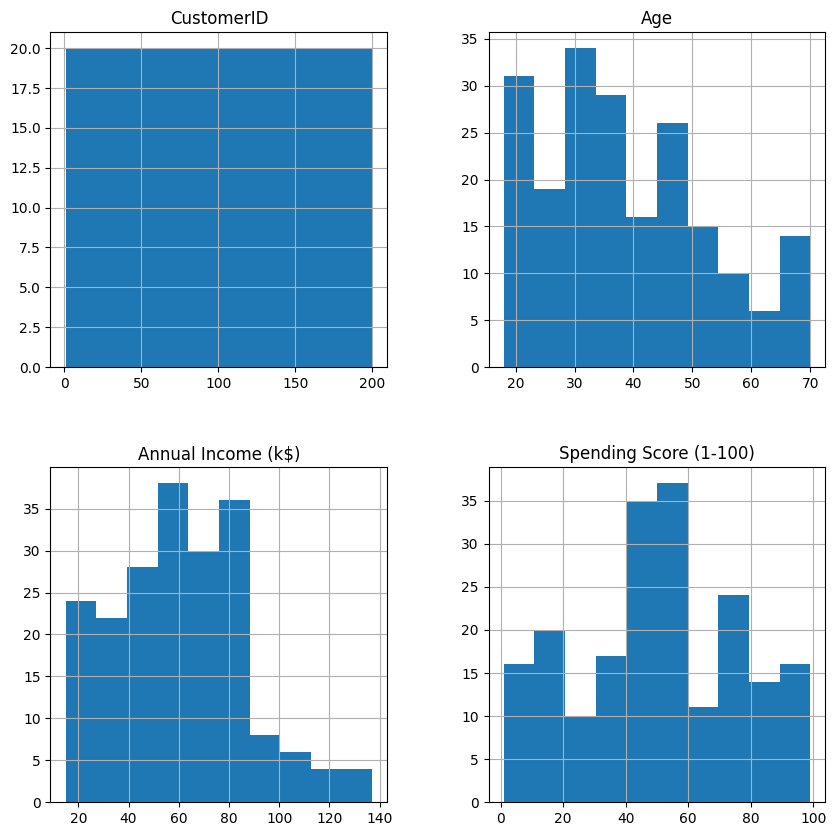

In [8]:
df.hist(figsize=(10, 10))

2. Boxplots pour chaque variables.

<Figure size 400x600 with 0 Axes>

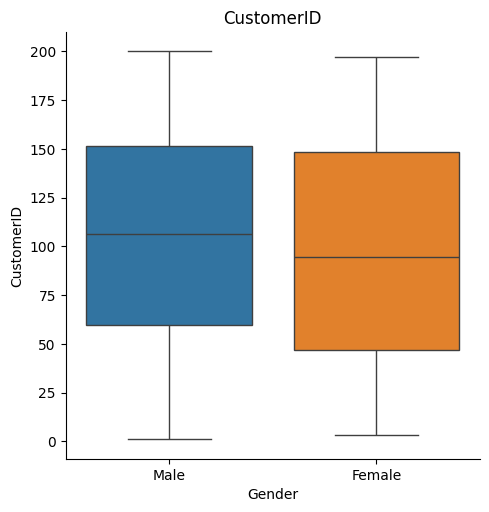

<Figure size 400x600 with 0 Axes>

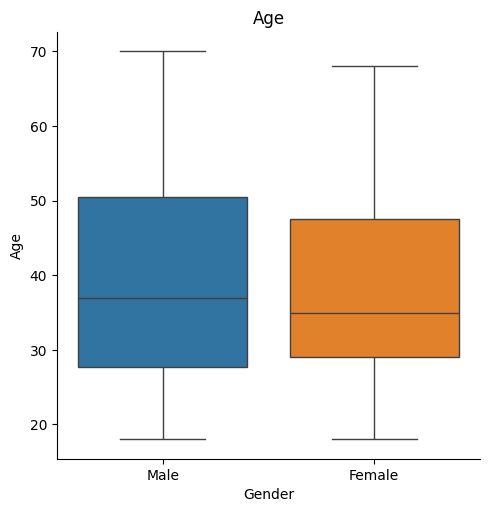

<Figure size 400x600 with 0 Axes>

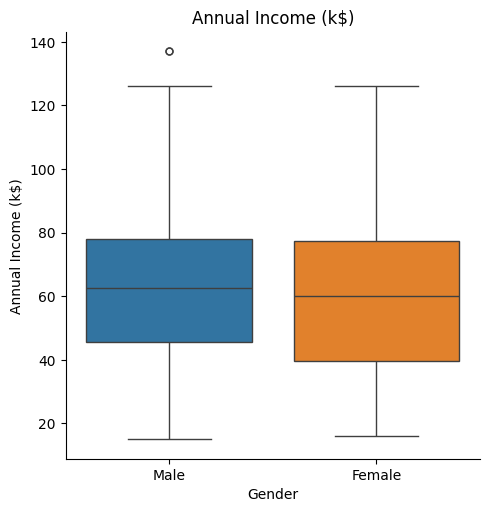

<Figure size 400x600 with 0 Axes>

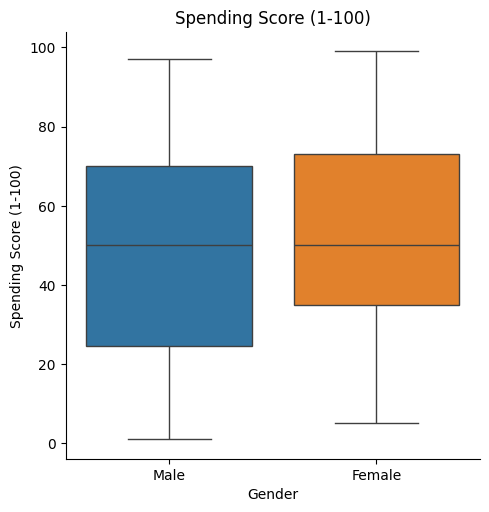

In [9]:
for col in df.columns:
    if (col != 'Gender'):
        plt.figure(figsize=(4,6))
        sns.catplot(data=df, y=col, x='Gender', hue="Gender", kind="box")
        plt.title(col)
        plt.show()

### EDA mutlivariée

Scatter plot de la relation entre age et revenue annuel.

On peut voir que ...

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

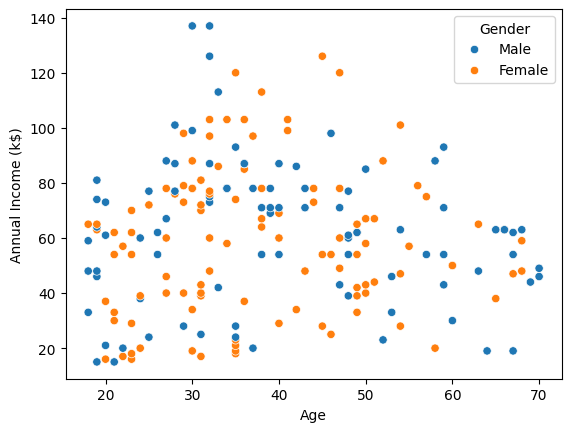

In [10]:
sns.scatterplot(x="Age", y="Annual Income (k$)", data=df, hue='Gender')

Scatter plot de la relation entre age et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

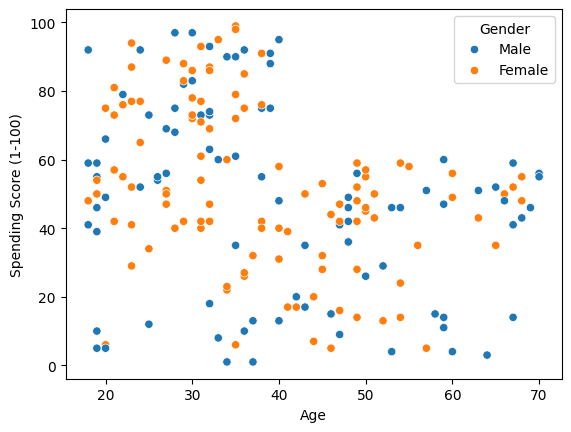

In [11]:
sns.scatterplot(x="Age", y="Spending Score (1-100)", data=df, hue='Gender')

Scatter plot de la relation entre revenue annuel et score de depense.

On peut voir que plus l'age est petit plus le score de depense est élevé.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

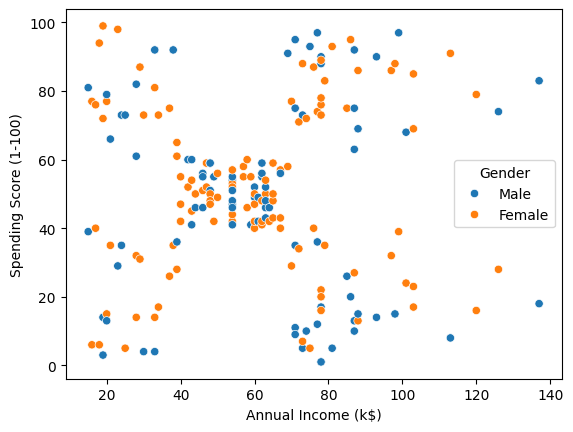

In [12]:
sns.scatterplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df, hue='Gender')

### Scatterplot Matrix des données

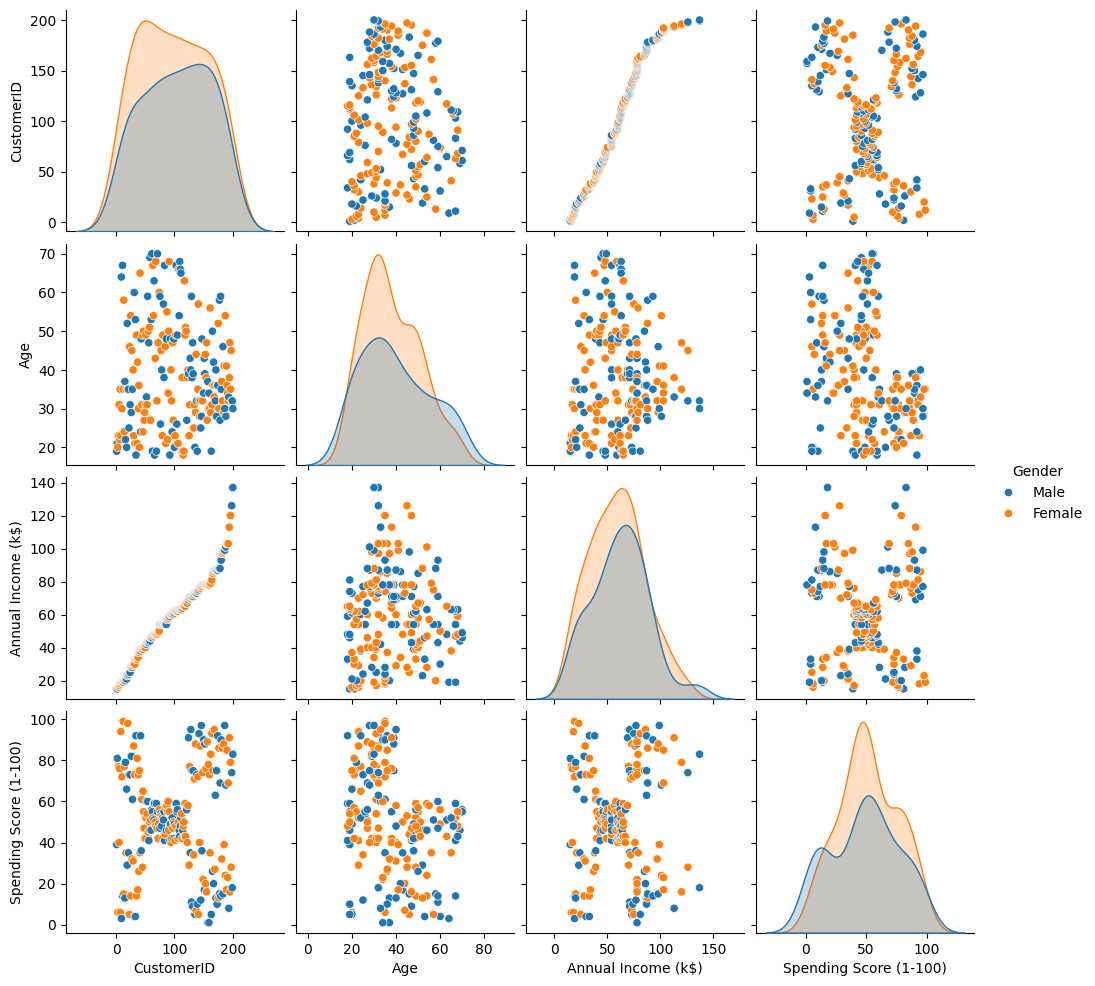

In [13]:
sns.pairplot(df, hue="Gender")

### Matrice de correlation

1. Suppression de la colonne `CustomerID` car qu'elle n'est d'aucunne utilitée informative.

In [14]:
df = df.drop('CustomerID',axis= 1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


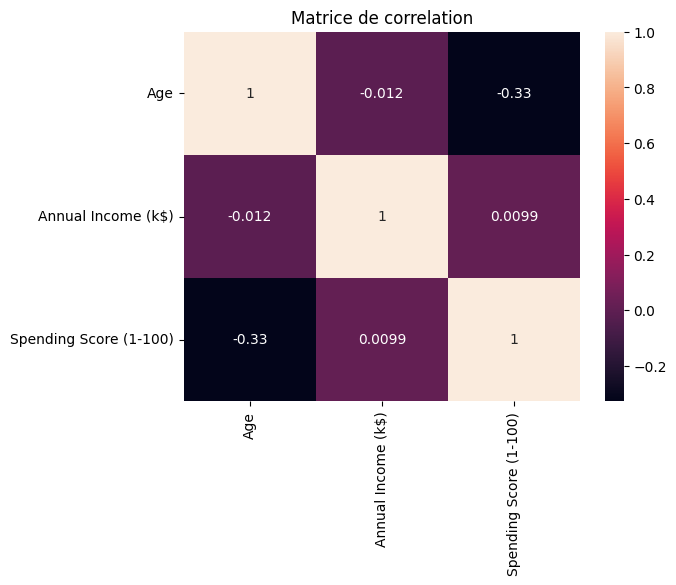

In [15]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Matrice de correlation")
plt.show()

## Feature engineering


1. Creation de classe d'ages et nombre de personne par classe d'ages.

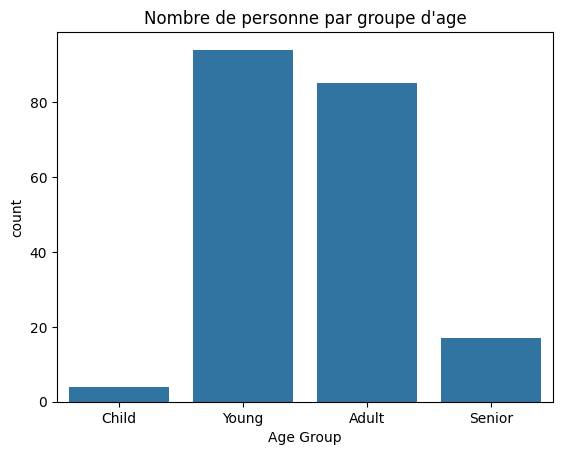

In [16]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young', 'Adult', 'Senior'])
# df['Age Group'].value_counts()

sns.countplot(data=df, x='Age Group')
plt.title("Nombre de personne par groupe d'age")
plt.show()

## Principal Component Analysis (PCA)

Application d'une PCA (Principal Component Analysis) pour visualiser les données en 2D.

1. Standarisation des valeurs.

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

x_scaled = scaler.fit_transform(x);

2. Application du PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x_scaled)

3. Visulalisation en 2D

## Clustering: K-means

1. Methode **Elbow**

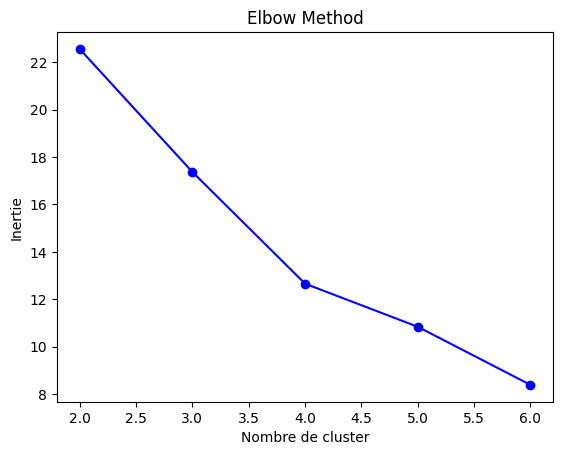

In [49]:
from sklearn.cluster import KMeans
inertia = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.ylabel("Inertie")
plt.xlabel("Nombre de cluster")
plt.title("Elbow Method")
plt.show()

Nous pouvons voir que le nombre de cluster `5` est le nombre ou l'inertie descent lentement. 

2. Methode **Silouhette**

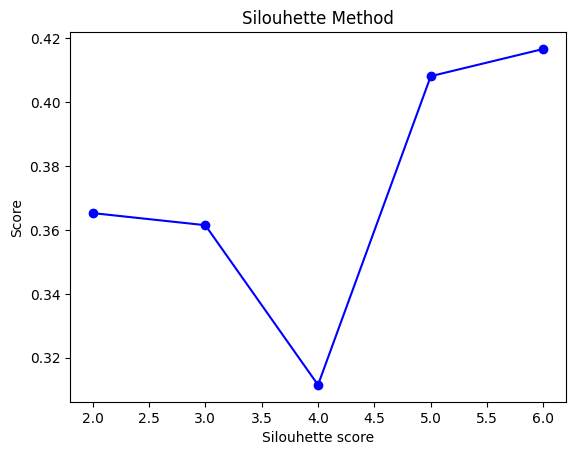

In [50]:
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled, labels)
    scores.append(score)
    
plt.plot(K_range, scores, 'bo-')
plt.ylabel("Score")
plt.xlabel("Silouhette score")
plt.title("Silouhette Method")
plt.show()

D'apres les deux methodes le nombre de cluster est `5`.

3. Clustering avec le model KMeans

In [87]:
kmeans = KMeans(n_clusters=5).fit(x_scaled)
clusters = kmeans.labels_
clusters_centroids = kmeans.cluster_centers_ 

print(clusters)

[3 0 3 0 3 0 3 0 1 0 1 0 1 0 3 0 3 0 1 0 3 0 1 0 1 0 1 0 3 0 1 0 1 0 1 0 1
 0 3 0 1 0 1 0 1 0 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 2 2 3 2 4 2 4 2 4 2 3 2 3 2 4 2 3 2 4 2 3 2 3 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 1 2 3 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


## Interpretation

1. Visualisation du clusters et leurs centroides.

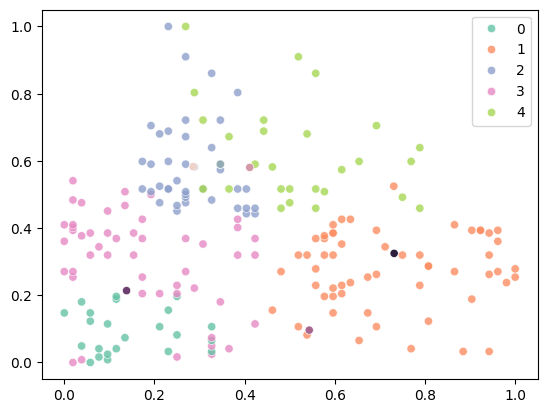

In [103]:

ax = sns.scatterplot(x=x_scaled[:, 0], y=x_scaled[:, 1], hue=clusters, palette='Set2', alpha=0.8)
sns.scatterplot(x=clusters_centroid[:, 0], y=clusters_centroid[:, 1], hue=range(5), legend=False,  sizes=200)
plt.show()

In [104]:
df['Cluster'] = clusters

2. Visualisation des revenues annuelles par rapport aux clusters.

<Axes: xlabel='Cluster', ylabel='count'>

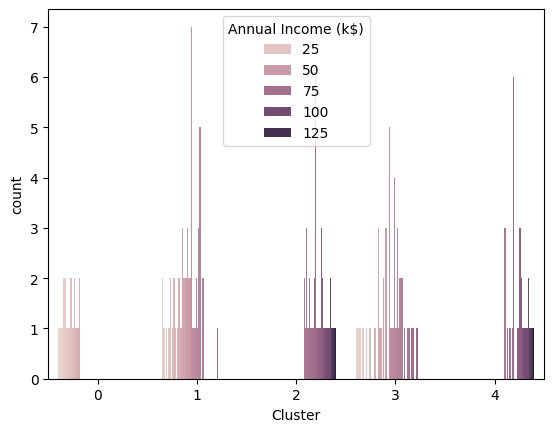

In [108]:
sns.countplot(x='Cluster', hue='Annual Income (k$)', data=df)

<Axes: xlabel='Cluster', ylabel='count'>

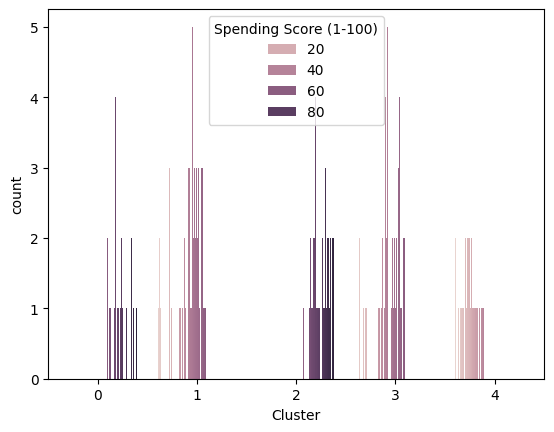

In [110]:
sns.countplot(x='Cluster', hue='Spending Score (1-100)', data=df)

In [121]:
df[df['Cluster'] == 0].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,23.000000,23.000000,23.000000,23.0
mean,25.521739,26.304348,78.565217,0.0
std,5.273170,7.893811,10.953729,0.0
min,18.000000,15.000000,61.000000,0.0
25%,21.500000,19.500000,73.000000,0.0
50%,24.000000,25.000000,77.000000,0.0
75%,30.000000,33.000000,84.500000,0.0
max,35.000000,39.000000,99.000000,0.0


Dans le cluster 0, les revenues annuels  sont inferieur a 40k et la plupart des score de depense sont entre 77 et 84.5

In [122]:
df[df['Cluster'] == 1].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,58.000000,58.000000,58.000000,58.0
mean,55.551724,48.482759,41.775862,1.0
std,8.324920,13.797077,15.658688,0.0
min,42.000000,19.000000,3.000000,1.0
25%,49.000000,40.500000,37.250000,1.0
50%,53.500000,49.000000,46.000000,1.0
75%,63.750000,60.000000,52.000000,1.0
max,70.000000,79.000000,60.000000,1.0


Dans le cluster 1, la majorité des revenues annuels  sont inferieur a 60k et les scores de depense sont inferieur a 52.

L'age des clients sont superieur à 42.

In [124]:
df[df['Cluster'] == 2].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,40.000000,40.000000,40.000000,40.0
mean,32.875000,86.100000,81.525000,2.0
std,3.857643,16.339036,9.999968,0.0
min,27.000000,69.000000,58.000000,2.0
25%,30.000000,74.750000,74.000000,2.0
50%,32.000000,78.500000,83.000000,2.0
75%,36.000000,94.000000,90.000000,2.0
max,40.000000,137.000000,97.000000,2.0


Dans le cluster 2, la majorité des revenues annuels  sont entre a 60k et 94k et les scores de depenses sont supérieur à 58.

L'age des clients sont entre 27 et 40 (Jeune et adulte)

In [125]:
df[df['Cluster'] == 3].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,49.000000,49.000000,49.000000,49.0
mean,27.061224,51.979592,41.040816,3.0
std,7.212282,17.652301,15.900680,0.0
min,18.000000,15.000000,5.000000,3.0
25%,20.000000,42.000000,35.000000,3.0
50%,26.000000,57.000000,42.000000,3.0
75%,33.000000,64.000000,54.000000,3.0
max,40.000000,81.000000,60.000000,3.0


Dans le cluster 3, la majorité des revenues annuels ont une moyenne de 51 et les scores de depenses une moyenne de 41.

L'age des clients sont entre 18 et 40, dont la majorité sont des jeunes qui ont en moyenne 27 ans.

In [118]:
df[df['Cluster'] == 4].describe()

,Age,Annual Income (k$),Spending Score (1-100),Cluster
count,30.000000,30.000000,30.000000,30.0
mean,44.000000,90.133333,17.933333,4.0
std,8.081482,16.919145,9.888807,0.0
min,32.000000,71.000000,1.000000,4.0
25%,37.000000,78.000000,11.500000,4.0
50%,43.500000,87.000000,16.500000,4.0
75%,47.750000,98.750000,23.750000,4.0
max,59.000000,137.000000,39.000000,4.0


Dans le cluster 4, les revenues annuels sont en moyenne 90k et les scores de depenses sont inferieure à 39.

L'age des clients sont entre 32 et 59, dont la majorité sont des adultes qui ont en moyenne 44 ans.

|Cluster| Label|
|-|-|
|0|Jeune - Revenue faible - Depense élevée|
|1|Adulte - Revenue élevée - Depense moyenne|
|2|Jeune - Revenue élevée - Depense élevée|
|3|Jeune - Revenue moyenne - Depense moyenne|
|4|Adulte - Revenue élevée - Depense faible|